In [1]:
pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [6]:
df = pd.read_csv('titanic.csv') 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()         
df.describe()      
df.shape           
df.columns         
df.nunique()       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

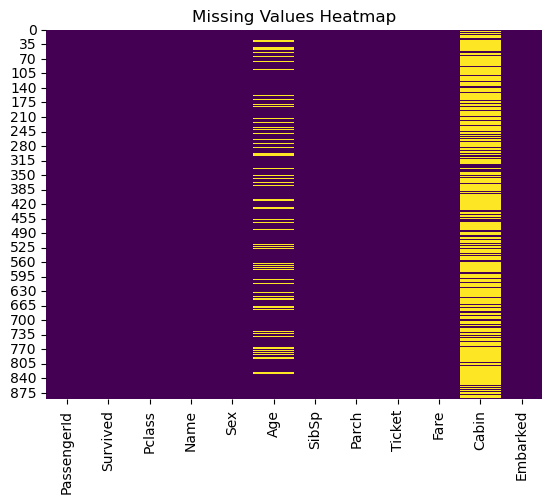

In [9]:
df.isnull().sum()

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [14]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [19]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

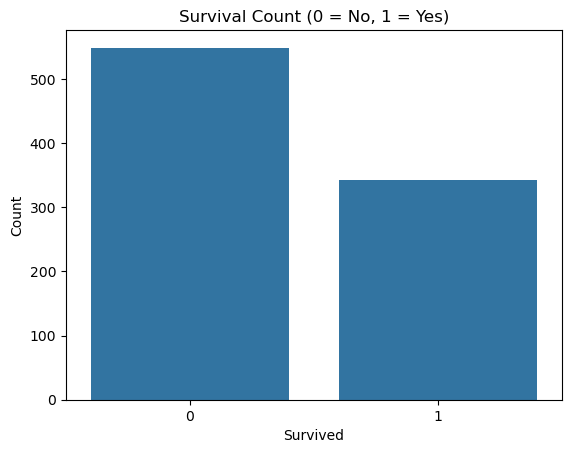

In [21]:

sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


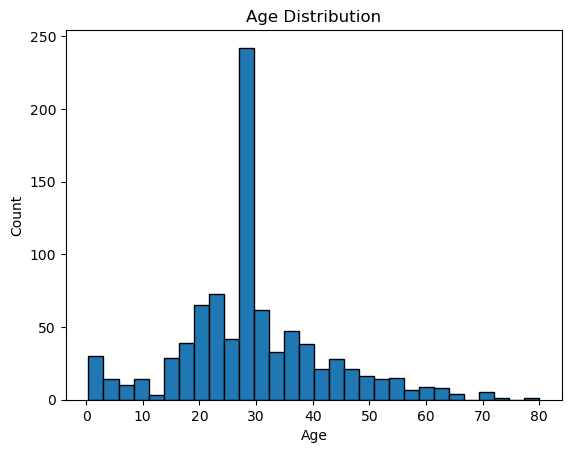

In [22]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


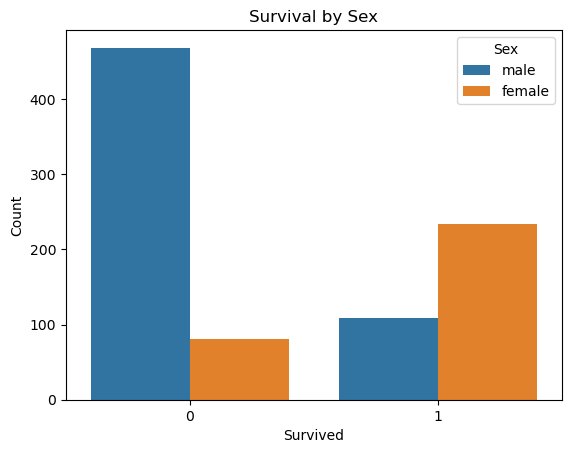

In [23]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


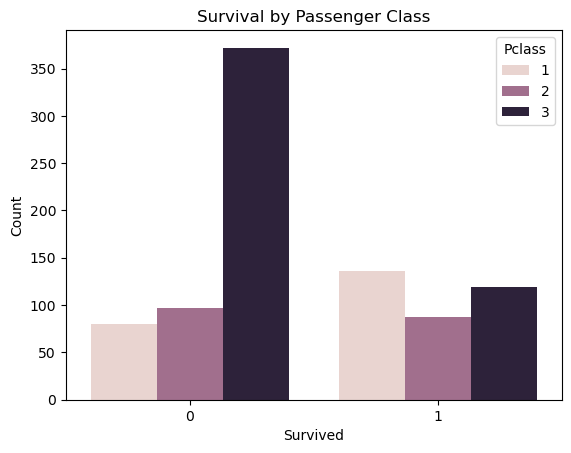

In [24]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()


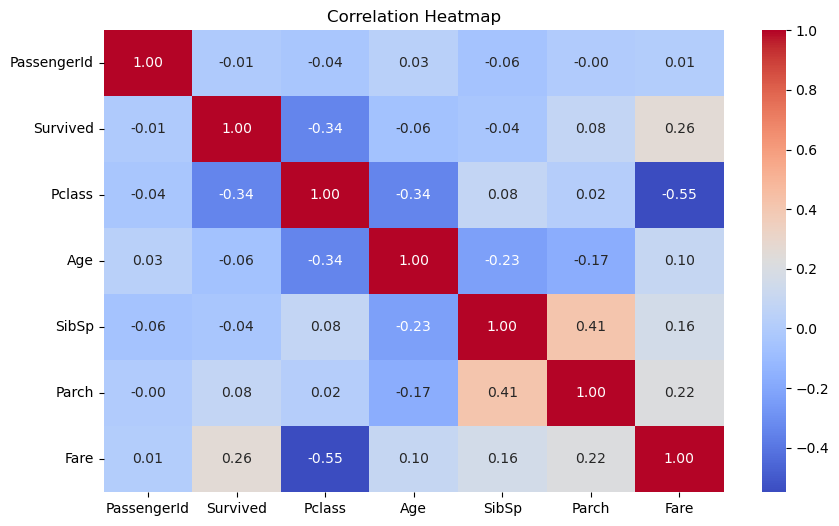

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### 📌 Key Insights:

- **Females** had a higher survival rate than males.
- Passengers in **1st class** had a better chance of survival than those in 2nd or 3rd class.
- Many young passengers were aboard (age skewed toward lower values).
- There were missing values in Age and Embarked.
- Positive correlation found between `Fare` and `Pclass`, indicating 1st class tickets were more expensive.
